# Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats
from scipy.stats import probplot, shapiro
np.random.seed(42)


# Problem 1
An emergency room (ER) receives patients randomly throughout the day. The number of patients arriving per hour follows a Poisson distribution with parameter 10 (10 patients per hour). Due to hospital capacity limitations, the ER becomes overcrowded when more than 15 patients arrive in a single hour. You will simulate patient arrivals and estimate probabilities related to ER overcrowding.

i.	Use simulation to estimate the probability that the ER experiences overcrowding (more than 15 patients in an hour).

In [124]:
def simulate_hours(lambda_param, hours):
    return np.random.poisson(lambda_param, hours)

lambda_param = 10
n = 1*10*7
poisson = simulate_hours(lambda_param, n) 
overcrowding_prob = np.mean(poisson > 15)

print(f"Estimated probability of ER overcrowding: {overcrowding_prob:.4f}")

Estimated probability of ER overcrowding: 0.0857


ii.	Simulate 100 days, each consisting of 24 hours of patient arrivals, estimate the proportion of days where the ER is overcrowded for at least 4 hours.

In [123]:
simulations = []
lambda_param = 10
days = 100
hours = 24
for i in range(days):
    poisson = simulate_hours(lambda_param, hours)
    simulations.append(poisson)

crowded_days = 0
for day in simulations:
    crowded_hours = 0
    for hour in day:
        if hour > 15:
            crowded_hours += 1
    if crowded_hours >= 4:
        crowded_days += 1
        
print(crowded_days/days)

0.01


iii.	Using the data simulated in the previous question, compute the mean of 24 hourly arrivals in each day, then you will have 100 average arrivals. Compare it to a normal distribution using QQ plot.

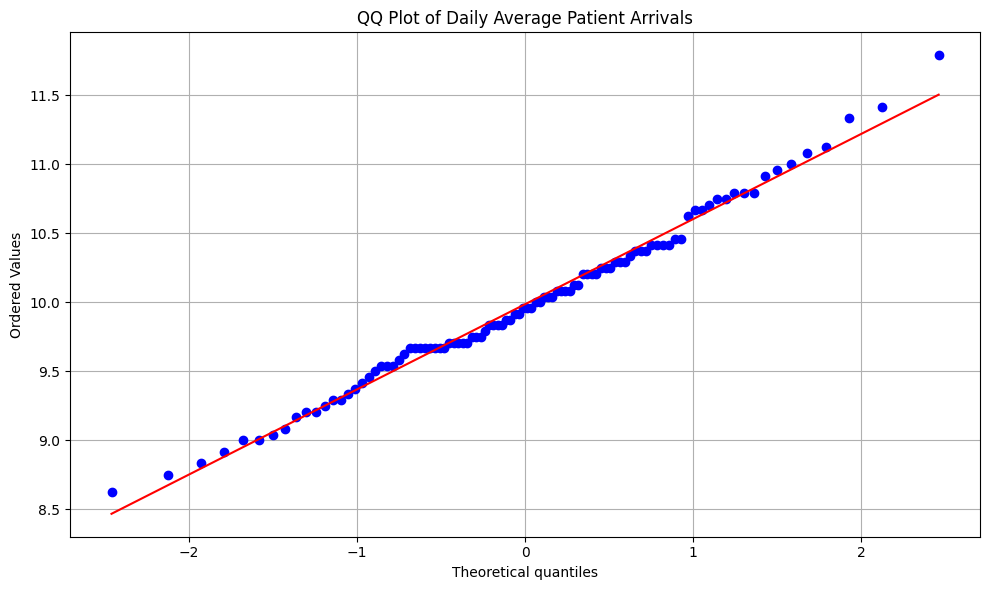

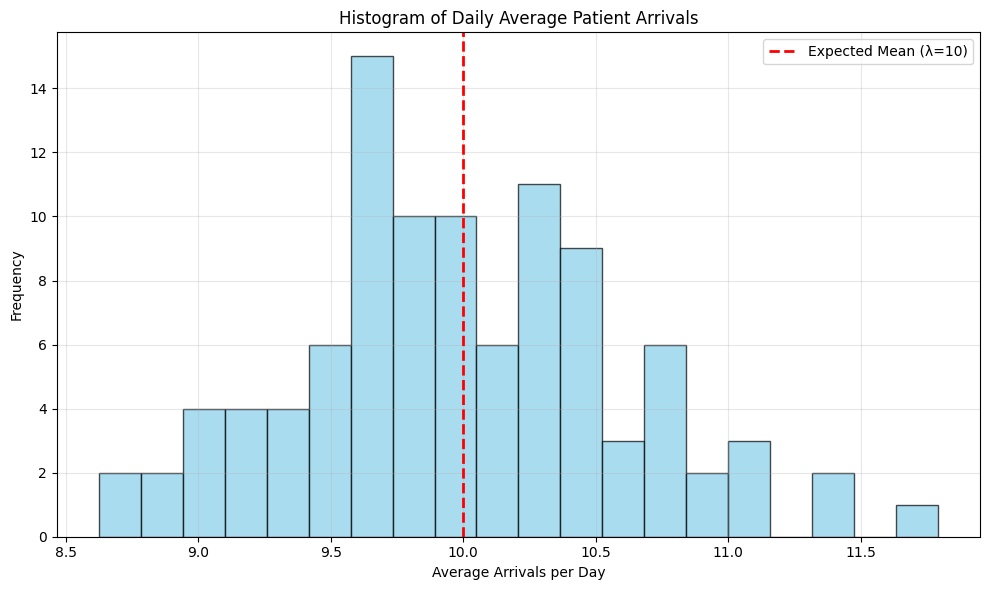

In [122]:
daily_means = np.array([np.mean(day) for day in simulations])

plt.figure(figsize=(10, 6))

probplot(daily_means, dist="norm", plot=plt)

plt.title('QQ Plot of Daily Average Patient Arrivals')
plt.grid(True)
plt.tight_layout()

plt.figure(figsize=(10, 6))
plt.hist(daily_means, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(lambda_param, color='red', linestyle='dashed', linewidth=2, label=f'Expected Mean (λ={lambda_param})')
plt.title('Histogram of Daily Average Patient Arrivals')
plt.xlabel('Average Arrivals per Day')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

# Problem 2

You are given a dataset containing the annual salaries (in $1000s) of 250 employees in a company. The dataset is stored as a csv file(employee_salaries.csv).

i.	Load the dataset and visualize the distribution of salaries using a histogram and a boxplot.

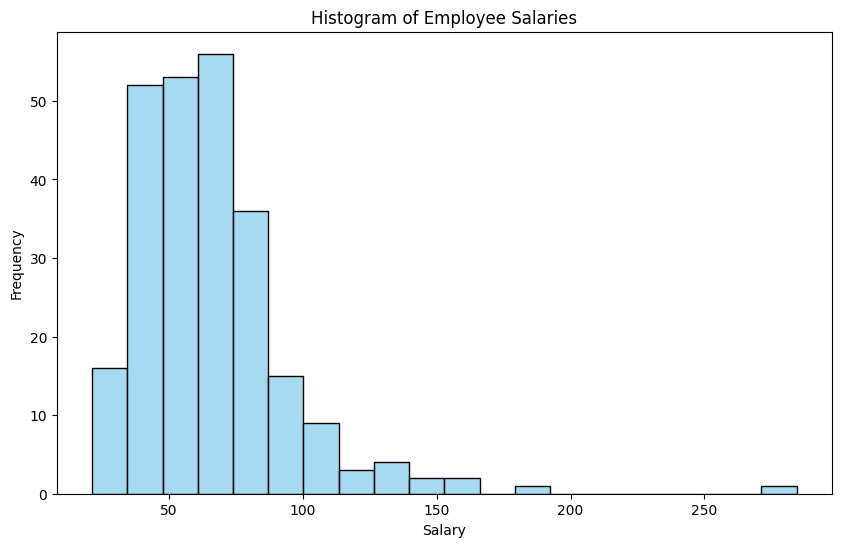

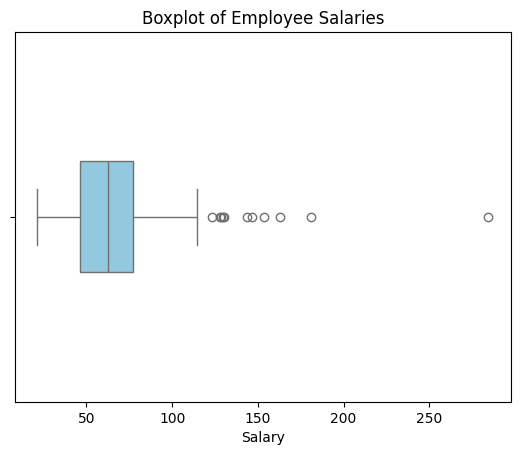

In [135]:
df = pd.read_csv('employee_salaries.csv')
plt.figure(figsize=(10, 6))

sns.histplot(df['Salary (in $1000s)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x='Salary (in $1000s)', data=df, color='skyblue', width=0.3)
plt.title('Boxplot of Employee Salaries')
plt.xlabel('Salary')
plt.show()


ii.	Compute the observed sample mean, median, and standard deviation of salaries.

In [136]:
mean = df['Salary (in $1000s)'].mean()
median = df['Salary (in $1000s)'].median()
std = df['Salary (in $1000s)'].std()

print(f"Mean: {mean:.2f}")
print(f"Median: {median:.2f}")
print(f"Standard Deviation: {std:.2f}")

Mean: 65.79
Median: 62.37
Standard Deviation: 29.12


iii.	Bootstrap estimation of the bias for the median:
a.	Perform 1,000 bootstrap resamples (sampling with replacement from the dataset)
b.	Compute the bootstrap median for each resample
c.	Estimate the bias of the sample median
